# Проект: Модель предсказания стоимости автомобиля на вторичном рынке

## Описание проекта

Проект посвящен разработке модели, способной предсказывать стоимость автомобилей на вторичном рынке. В рамках исследования будут выполнены этапы:

1. **Загрузка и предварительное ознакомление с данными**: Начнем с сбора данных и изучения их основных характеристик.
2. **Предварительная обработка**: Произведем очистку данных от выбросов, пропусков и шумов, чтобы обеспечить надежную основу для анализа.
3. **Разведочный анализ**: Глубоко изучим данные, выявим закономерности и зависимости, которые могут влиять на стоимость автомобилей.
4. **Создание новых синтетических признаков**: Разработаем новые признаки на основе имеющихся данных, что поможет улучшить точность модели.
5. **Проверка на мультиколлинеарность**: Оценим корреляцию между признаками и решим вопрос о возможной мультиколлинеарности.
6. **Выбор финального набора обучающих признаков**: Выберем наиболее значимые и информативные признаки для обучения модели.
7. **Выбор и обучение моделей**: Исследуем различные алгоритмы машинного обучения, выберем оптимальные и проведем их обучение.
8. **Итоговая оценка качества предсказаний**: Оценим качество предсказаний лучшей модели на тестовой выборке и сравним с базовыми показателями.
9. **Анализ важности признаков**: Раскроем значимость каждого признака для предсказания стоимости автомобилей.

**Описание данных**

1) `train.csv` - информация о характеристиках автомобилей (440000), которые будут использоваться в качестве обучающих данных.

2) `test.csv` - информация о характеристиках автомобилей (110000), которые будут использоваться в качестве тестовых данных. **Задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета**.

*sellingprice* - Целевой признак. Для каждого автомобиля необходимо предсказать числовое значение стоимости продажи.

3) `sample_submission.csv` - пример файла предсказаний в правильном формате.

4) `vin` - идентификатор автомобиля в тестовом наборе.


**Описание полей данных**

* `Date`: Год выпуска автомобиля.
* `Make` Марка автомобиля.
* `Model`: издание автомобиля определенной марки.
* `Trim`: Уровни отделки салона автомобиля — это просто разные версии модели.
* `Body`: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
* `Transmission`: механизм, который передает мощность от двигателя к колесам.
* `VIN`: идентификационный номер транспортного средства.
* `State`: состояние, в котором автомобиль выставлен на аукцион.
* `Condition`: Состояние автомобилей на момент аукциона.
* `Odometer`: расстояние, пройденное автомобилем с момента выпуска.
* `Color`: Цвет кузова автомобиля.
* `Interior`: Цвет салона автомобиля.
* `Seller`: Продавец автомобиля, автосалоны.
* `mmr`: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
* `sellingprice`: цена, по которой автомобиль был продан на аукционе.
* `saledate`: Дата продажи автомобиля.

## Загрузка данных

In [1]:
!pip install vininfo[cli] -q


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy.sparse
from scipy.sparse import hstack as sp_hstack
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
#from tqdm import trange
import torch
from torch.nn import BatchNorm1d, LeakyReLU, Linear, Sequential
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm.notebook import trange
from vininfo import Vin


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ngrams/ngrams.pth
/kaggle/input/cars-data/train.csv
/kaggle/input/cars-data/test.csv
/kaggle/input/used-cars-price-prediction-22ds/sample_submission.csv
/kaggle/input/used-cars-price-prediction-22ds/train.csv
/kaggle/input/used-cars-price-prediction-22ds/test.csv


In [4]:
train_df = pd.read_csv('/kaggle/input/cars-data/train.csv')
test_df = pd.read_csv('/kaggle/input/cars-data/test.csv')

In [5]:
display(train_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


Тренировочные данные содержат 15 столбцов и 440236 строк с типами данных `int`, `float` и `object`. Имеются пропуски. Отсутствует столбец `mmr`. Визуальных странностей в первых строках данных нет.

In [7]:
display(test_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


Тестовые данные содержат 14 столбцов и 110058 строк с типами данных `int`, `float` и `object`. Имеются пропуски. Отсутствует столбец `mmr`. Визуальных странностей в первых строках данных нет.

## Обработка категориальных данных

### Обработка пропусков

In [9]:
train_df.isna().sum()

year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

In [10]:
cat_columns_to_fill = ['make', 'model', 'trim', 'interior', 'color', 'transmission', 'body']
num_columns_to_fill = ['condition', 'odometer']

def fill_na(df, columns, value):
    for col in columns:
        df[col] = df[col].fillna(value)

fill_na(train_df, cat_columns_to_fill, 'unknown')
fill_na(test_df, cat_columns_to_fill, 'unknown')

In [11]:
test_df.isna().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition       2379
odometer          19
color              0
interior           0
seller             0
saledate           0
dtype: int64

Изучение уникальных значений

In [12]:
print(train_df['make'].unique())
print("Число уникальных значений в исходном столбце: ", len(train_df['make'].unique()))

['Ford' 'Nissan' 'HUMMER' 'Lincoln' 'pontiac' 'Hyundai' 'unknown' 'Buick'
 'Chevrolet' 'Honda' 'Acura' 'Cadillac' 'GMC' 'Saab' 'Dodge'
 'Mercedes-Benz' 'Toyota' 'Volkswagen' 'BMW' 'Infiniti' 'Chrysler' 'Kia'
 'Jaguar' 'Subaru' 'Jeep' 'Lexus' 'mercedes' 'Scion' 'FIAT' 'Suzuki'
 'Mazda' 'Volvo' 'Audi' 'MINI' 'Isuzu' 'Mitsubishi' 'smart' 'Pontiac'
 'Porsche' 'subaru' 'ford' 'Land Rover' 'chrysler' 'Saturn' 'mazda'
 'dodge' 'Ram' 'Oldsmobile' 'hyundai' 'Mercury' 'Bentley' 'toyota'
 'lincoln' 'Fisker' 'nissan' 'chevrolet' 'honda' 'porsche' 'mitsubishi'
 'lexus' 'bmw' 'Maserati' 'acura' 'jeep' 'mercury' 'Tesla' 'landrover'
 'vw' 'cadillac' 'buick' 'gmc truck' 'land rover' 'volkswagen'
 'Rolls-Royce' 'audi' 'Ferrari' 'suzuki' 'Plymouth' 'oldsmobile'
 'Lamborghini' 'gmc' 'Geo' 'ford truck' 'Aston Martin' 'plymouth' 'Daewoo'
 'maserati' 'kia' 'mercedes-b' 'dodge tk' 'mazda tk' 'dot' 'airstream']
Число уникальных значений в исходном столбце:  93


Имеются неявные дубликаты разного регистра. Понизим регистр строковыз данных

In [13]:
train_df['make'] = train_df['make'].str.lower()
print(train_df['make'].unique())
print("Число уникальных значений после понижения регистра: ", len(train_df['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'unknown' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge'
 'mercedes-benz' 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia'
 'jaguar' 'subaru' 'jeep' 'lexus' 'mercedes' 'scion' 'fiat' 'suzuki'
 'mazda' 'volvo' 'audi' 'mini' 'isuzu' 'mitsubishi' 'smart' 'porsche'
 'land rover' 'saturn' 'ram' 'oldsmobile' 'mercury' 'bentley' 'fisker'
 'maserati' 'tesla' 'landrover' 'vw' 'gmc truck' 'rolls-royce' 'ferrari'
 'plymouth' 'lamborghini' 'geo' 'ford truck' 'aston martin' 'daewoo'
 'mercedes-b' 'dodge tk' 'mazda tk' 'dot' 'airstream']
Число уникальных значений после понижения регистра:  63


In [14]:
u = train_df['make'].unique()

In [15]:
u = list(u)

In [16]:
u = [value for value in u if not pd.isna(value)]
u.sort()
print(u)

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford truck', 'geo', 'gmc', 'gmc truck', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'unknown', 'volkswagen', 'volvo', 'vw']


Имеются неявные дубликаты одного и того же производителя. Заменим данные дубликаты:

In [17]:
make_mapping = {
    'dodge tk': 'dodge',
    'ford truck': 'ford',
    'gmc truck': 'gmc',
    'land rover': 'landrover',
    'mazda tk': 'mazda',
    'mercedes-b': 'mercedes',
    'mercedes-benz': 'mercedes',
    'vw': 'volkswagen'
}

train_df['make'] = train_df['make'].replace(make_mapping)

Изучение уникальных значений тестовой выборки:

In [18]:
print(test_df['make'].unique())
print("Число уникальных значений в исходном столбце: ", len(test_df['make'].unique()))

['Cadillac' 'GMC' 'Nissan' 'Chevrolet' 'Volkswagen' 'Hyundai' 'Ford'
 'Infiniti' 'Subaru' 'Kia' 'BMW' 'unknown' 'Mitsubishi' 'Dodge'
 'Oldsmobile' 'Volvo' 'Pontiac' 'Acura' 'Honda' 'Toyota' 'Audi' 'Jeep'
 'Lincoln' 'Chrysler' 'Mercedes-Benz' 'Ram' 'Scion' 'Mercury' 'Lexus'
 'Saturn' 'Mazda' 'Porsche' 'MINI' 'smart' 'Buick' 'HUMMER' 'ford'
 'chrysler' 'Jaguar' 'mitsubishi' 'FIAT' 'Saab' 'mazda' 'Suzuki'
 'Land Rover' 'bmw' 'cadillac' 'oldsmobile' 'honda' 'acura' 'buick'
 'landrover' 'Geo' 'lexus' 'dodge' 'chevrolet' 'chev truck' 'nissan'
 'Bentley' 'jeep' 'mercury' 'toyota' 'gmc' 'Isuzu' 'Aston Martin'
 'Maserati' 'land rover' 'kia' 'subaru' 'Daewoo' 'vw' 'volkswagen' 'Tesla'
 'mercedes' 'Ferrari' 'hyundai' 'pontiac' 'Fisker' 'porsche' 'Rolls-Royce'
 'Lotus' 'Plymouth' 'hyundai tk' 'lincoln' 'ford tk' 'audi']
Число уникальных значений в исходном столбце:  86


In [19]:
test_df['make'] = test_df['make'].str.lower()
print(test_df['make'].unique())
print("Число уникальных значений после понижения регистра ", len(test_df['make'].unique()))

['cadillac' 'gmc' 'nissan' 'chevrolet' 'volkswagen' 'hyundai' 'ford'
 'infiniti' 'subaru' 'kia' 'bmw' 'unknown' 'mitsubishi' 'dodge'
 'oldsmobile' 'volvo' 'pontiac' 'acura' 'honda' 'toyota' 'audi' 'jeep'
 'lincoln' 'chrysler' 'mercedes-benz' 'ram' 'scion' 'mercury' 'lexus'
 'saturn' 'mazda' 'porsche' 'mini' 'smart' 'buick' 'hummer' 'jaguar'
 'fiat' 'saab' 'suzuki' 'land rover' 'landrover' 'geo' 'chev truck'
 'bentley' 'isuzu' 'aston martin' 'maserati' 'daewoo' 'vw' 'tesla'
 'mercedes' 'ferrari' 'fisker' 'rolls-royce' 'lotus' 'plymouth'
 'hyundai tk' 'ford tk']
Число уникальных значений после понижения регистра  59


In [20]:
make_mapping = {
    'dodge tk': 'dodge',
    'ford truck': 'ford',
    'gmc truck': 'gmc',
    'chev truck': 'chevrolet',
    'ford tk': 'ford',
    'hyundai tk': 'hyundai',
    'land rover': 'landrover',
    'mercedes-b': 'mercedes',
    'mercedes-benz': 'mercedes',
    'vw': 'volkswagen'
}

test_df['make'] = test_df['make'].replace(make_mapping)

In [21]:
# print(train_df['model'].unique())
print("Число уникальных значений до понижения регистра: ", len(train_df['model'].unique()))

Число уникальных значений до понижения регистра:  960


In [22]:
train_df['model'] = train_df['model'].str.lower()
# print(train_df['model'].unique())
print("Число уникальных значений после понижения регистра: ", len(train_df['model'].unique()))

Число уникальных значений после понижения регистра:  840


In [23]:
# print(test_df['model'].unique())
print("Число уникальных значений до понижения регистра: ", len(test_df['model'].unique()))

Число уникальных значений до понижения регистра:  825


In [24]:
test_df['model'] = test_df['model'].str.lower()
# print(test_df['model'].unique())
print("Число уникальных значений после понижения регистра: ", len(test_df['model'].unique()))

Число уникальных значений после понижения регистра:  747


In [25]:
print('Количество уникальных значений с неявными дубликатами: ', len(test_df['trim'].unique()))
test_df['trim'] = test_df['trim'].str.lower()
# print(test_df['trim'].unique())
print('Количество уникальных значений после применения  lowrecase: ', len(test_df['trim'].unique()))

Количество уникальных значений с неявными дубликатами:  1497
Количество уникальных значений после применения  lowrecase:  1458


In [26]:
train_df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,ford,edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,ford,fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          440236 non-null  object 
 2   model         440236 non-null  object 
 3   trim          440236 non-null  object 
 4   body          440236 non-null  object 
 5   transmission  440236 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         440236 non-null  object 
 11  interior      440236 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   model         110058 non-null  object 
 3   trim          110058 non-null  object 
 4   body          110058 non-null  object 
 5   transmission  110058 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         110058 non-null  object 
 11  interior      110058 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


Пропуски категориальных данных обработаны

In [29]:
print('Количество явных дубликатов тренировочной выборки:',train_df.duplicated().sum())
print('Количество явных дубликатов тестовой выборки:',test_df.duplicated().sum())

Количество явных дубликатов тренировочной выборки: 0
Количество явных дубликатов тестовой выборки: 0


Дубликаты не обнаружены

### Обработка количественных признаков

In [30]:
def plot_distribution(data, column, title=None):

    """
    Функция строит гистограмму распределения данных для указанного столбца в датафрейме.

    Параметры:
        data (pandas.DataFrame): Датафрейм, содержащий данные.
        column (str): Имя столбца, для которого требуется построить гистограмму распределения.
        title (str, по умолчанию None): Название графика. Если не указано, используется автоматически сформированное название.

    Возвращаемое значение:
        None
        Выводит на экран графики для каждого столбца.
    """

    plt.figure()
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f"Распределение столбца '{column}'" if title is None else title)
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.show()

Изучим распределение значений столбца condition

In [31]:
print(train_df['condition'].value_counts())

1.9    33207
3.5    21016
3.7    20399
4.4    20027
4.3    19712
4.2    19345
3.6    18209
4.1    18108
2.0    16431
4.0    15797
3.9    15623
2.8    15012
2.9    14823
3.8    14785
3.4    13654
2.7    12837
4.9    10305
4.8    10040
2.5     9900
4.6     9897
4.5     9660
2.6     9403
4.7     9058
5.0     8862
3.3     8459
3.0     8451
3.2     7861
2.4     7378
2.1     7260
3.1     7258
2.3     6436
1.0     5855
2.2     4742
1.8      249
1.7      198
1.6      132
1.5      123
1.4      103
1.2       74
1.1       74
1.3       68
Name: condition, dtype: int64


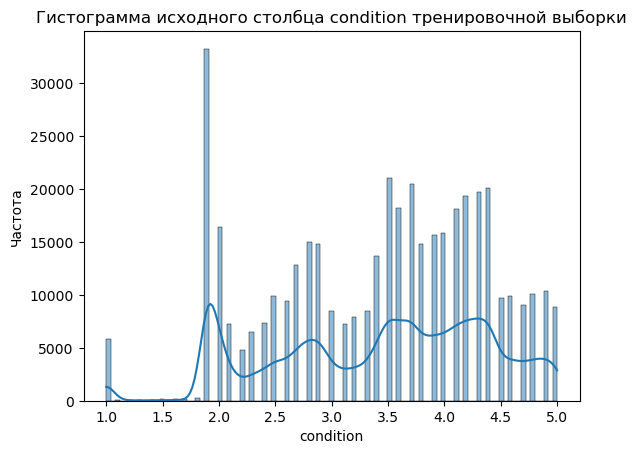

In [32]:
plot_distribution(train_df, 'condition', 'Гистограмма исходного столбца condition тренировочной выборки')

Распределение не похоже на нормальное, вероятно, преобладают автомобили определенных состояний

In [33]:
print(test_df['condition'].value_counts())

1.9    8429
3.5    5233
4.4    5096
3.7    5066
4.3    4832
4.2    4631
3.6    4574
4.1    4552
2.0    4117
3.9    3995
4.0    3921
2.8    3864
2.9    3810
3.8    3669
3.4    3422
2.7    3235
4.9    2626
4.6    2557
4.8    2521
4.5    2463
2.5    2444
2.6    2290
5.0    2218
3.0    2194
4.7    2152
3.3    1976
3.2    1919
3.1    1791
2.1    1782
2.4    1780
2.3    1603
1.0    1468
2.2    1199
1.8      69
1.6      43
1.7      42
1.4      29
1.2      21
1.5      20
1.1      13
1.3      13
Name: condition, dtype: int64


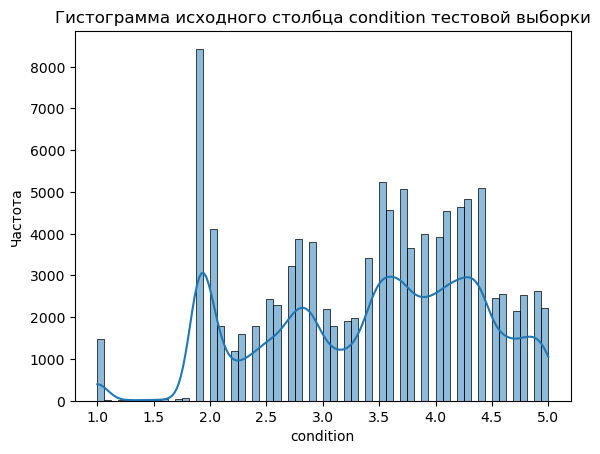

In [34]:
plot_distribution(test_df, 'condition', 'Гистограмма исходного столбца condition тестовой выборки')

Аналогичная картина наблюдается в тестовых данных, больше всего имеется автомобилей с состоянием `1.9`. Возможно, это может быть шкала или рейтинг, которая оценивает состояние автомобиля по какому-то критерию. Например, это может быть рейтинг состояния кузова, двигателя, салона, или других аспектов автомобиля. В данном случае, значение `1.9` могло бы указывать на хорошее состояние автомобиля, где более низкое значение может соответствовать лучшему состоянию.



Исследуем столбец odometer

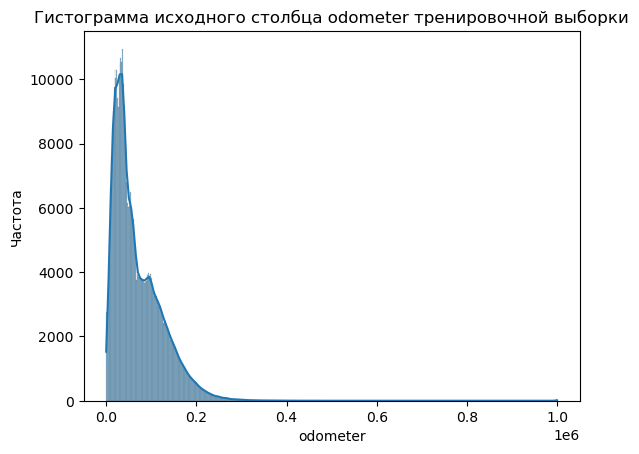

In [35]:
plot_distribution(train_df, 'odometer', 'Гистограмма исходного столбца odometer тренировочной выборки')

Распределение столбца odometer левонаправленное. Оно может быть в случае анализа автомобильных данных, если большинство автомобилей имеют небольшой пробег, а автомобили с очень большими пробегами являются редкостью.

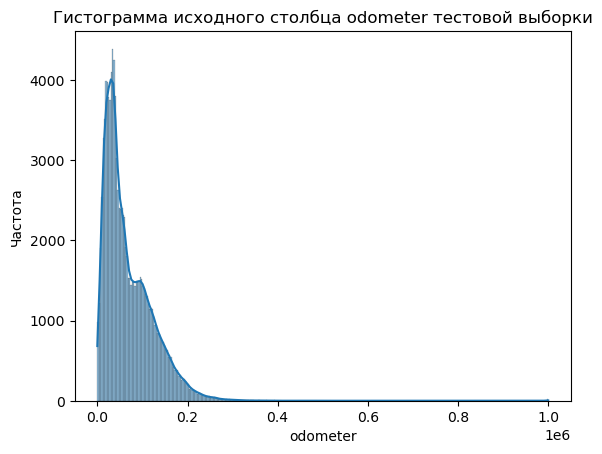

In [36]:
plot_distribution(test_df, 'odometer', 'Гистограмма исходного столбца odometer тестовой выборки')

Аналогичная картина наблюдается в тестовых данных

<Axes: >

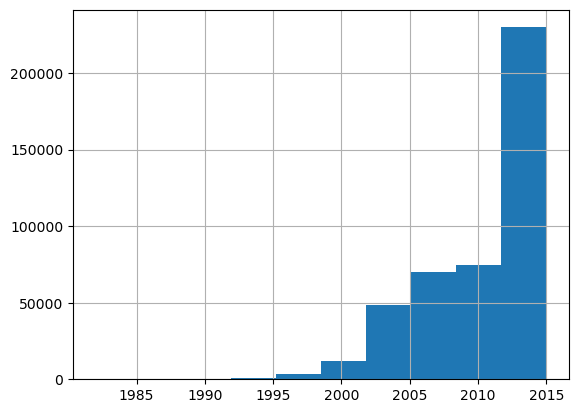

In [37]:
train_df['year'].hist()

In [38]:
display(train_df.query('year < 1900'))

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate


In [39]:
display(test_df.query('year < 1900'))

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate


В столбце года выпуска имеются странные значения года поизводства авто. Это выбросы, из нужно удалить

In [40]:
train_df = train_df.query('year > 1900')
test_df = test_df.query('year > 1900')

В столбцах имеются пропуски, которые заполним нулями, свидетельствующими об отсутствии информации о состоянии автомобиля или нулевом пробеге

In [41]:
num_columns_to_fill = ['condition', 'odometer']

fill_na(train_df, num_columns_to_fill, 0)
fill_na(test_df, num_columns_to_fill, 0)

### Генерация дополнительных признаков

Создадим дополнительные признаки из даты продажи:

* год продажи
* месяц
* неделя в году
* день недели продажи
* час продажи
* неделя каждого года продажи

In [42]:
train_df['sale_year'] = pd.to_datetime(train_df['saledate'], utc=True).dt.year
train_df['month'] = pd.to_datetime(train_df['saledate'], utc=True).dt.month
train_df['week'] = pd.to_datetime(train_df['saledate'], utc=True).dt.week
train_df['dow'] = pd.to_datetime(train_df['saledate'], utc=True).dt.dayofweek
train_df['hour'] = str(pd.to_datetime(train_df['saledate'], utc=True).dt.hour) + '_' + train_df['state']
train_df['year_week'] = str(train_df['week']) + '_' + str (train_df['year'])

test_df['sale_year'] = pd.to_datetime(test_df['saledate'], utc=True).dt.year
test_df['month'] = pd.to_datetime(test_df['saledate'], utc=True).dt.month
test_df['week'] = pd.to_datetime(test_df['saledate'], utc=True).dt.week
test_df['dow'] = pd.to_datetime(test_df['saledate'], utc=True).dt.dayofweek
test_df['hour'] = str(pd.to_datetime(test_df['saledate'], utc=True).dt.hour) + '_' + test_df['state']
test_df['year_week'] = str(test_df['week']) + '_' + str (test_df['year'])

/tmp/ipykernel_499/1571276570.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df['week'] = pd.to_datetime(train_df['saledate'], utc=True).dt.week
/tmp/ipykernel_499/1571276570.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['week'] = pd.to_datetime(test_df['saledate'], utc=True).dt.week


Для удобства переведем столбец даты продажи в секунды:

In [43]:
train_df['saledate'] = pd.to_datetime(train_df['saledate'], utc=True).astype('int64') // 10**6
test_df['saledate'] = pd.to_datetime(test_df['saledate'], utc=True).astype('int64') // 10**6

In [44]:
train_df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,sellingprice,saledate,sale_year,month,week,dow,hour,year_week
0,2011,ford,edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,black,santander consumer,12500,1433187000000,2015,6,23,0,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...
1,2014,ford,fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,black,ars/avis budget group,14500,1424800800000,2015,2,9,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...


Cоздадим строковый признак года производства, чтобы восстановить нелинейную зависимость от года

In [45]:
train_df['init_year'] = train_df['year'].astype('str')
test_df['init_year'] = test_df['year'].astype('str')

In [46]:
train_df['produce_date'] = pd.to_datetime(train_df['year'], format='%Y')

In [47]:
train_df['produce_date'] = pd.to_datetime(train_df['year'], format='%Y')
test_df['produce_date'] = pd.to_datetime(test_df['year'], format='%Y')

In [48]:
train_df['produce_date'].head()

0   2011-01-01
1   2014-01-01
2   2012-01-01
3   2003-01-01
4   2007-01-01
Name: produce_date, dtype: datetime64[ns]

Перевод даты производства в секунды

In [49]:
train_df['produce_date'] = pd.to_datetime(train_df['produce_date'], utc=True).astype('int64') // 10**6
test_df['produce_date'] = pd.to_datetime(test_df['produce_date'], utc=True).astype('int64') // 10**6

In [50]:
print(train_df['produce_date'])

0         1293840000000
1         1388534400000
2         1325376000000
3         1041379200000
4         1167609600000
              ...      
440231    1356998400000
440232    1388534400000
440233    1199145600000
440234    1388534400000
440235    1356998400000
Name: produce_date, Length: 440236, dtype: int64


Создание признака возраста автомобиля

In [51]:
train_df['time_difference'] = train_df['saledate'] - train_df['produce_date']
test_df['time_difference'] = test_df['saledate'] - test_df['produce_date']

In [52]:
train_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,saledate,sale_year,month,week,dow,hour,year_week,init_year,produce_date,time_difference
0,2011,ford,edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,1433187000000,2015,6,23,0,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2011,1293840000000,139347000000
1,2014,ford,fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,1424800800000,2015,2,9,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2014,1388534400000,36266400000
2,2012,nissan,sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,1433878200000,2015,6,24,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2012,1325376000000,108502200000
3,2003,hummer,h2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,1434484800000,2015,6,25,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2003,1041379200000,393105600000
4,2007,ford,fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,1422907200000,2015,2,6,0,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2007,1167609600000,255297600000


Задача предсказания цены - нелинейная, а задача предстказания экспоненты цены - линейная. Поэтому необходимо логарифмировать целевой признак. Это необходимо для линейных моделей и нейросетей

In [53]:
train_df['lg_selling_price'] = np.log(train_df['sellingprice'])

In [54]:
train_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,sale_year,month,week,dow,hour,year_week,init_year,produce_date,time_difference,lg_selling_price
0,2011,ford,edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,2015,6,23,0,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2011,1293840000000,139347000000,9.433484
1,2014,ford,fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,2015,2,9,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2014,1388534400000,36266400000,9.581904
2,2012,nissan,sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,2015,6,24,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2012,1325376000000,108502200000,9.116030
3,2003,hummer,h2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,2015,6,25,1,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2003,1041379200000,393105600000,9.495519
4,2007,ford,fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,2015,2,6,0,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2007,1167609600000,255297600000,7.170120


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440236 entries, 0 to 440235
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              440236 non-null  int64  
 1   make              440236 non-null  object 
 2   model             440236 non-null  object 
 3   trim              440236 non-null  object 
 4   body              440236 non-null  object 
 5   transmission      440236 non-null  object 
 6   vin               440236 non-null  object 
 7   state             440236 non-null  object 
 8   condition         440236 non-null  float64
 9   odometer          440236 non-null  float64
 10  color             440236 non-null  object 
 11  interior          440236 non-null  object 
 12  seller            440236 non-null  object 
 13  sellingprice      440236 non-null  int64  
 14  saledate          440236 non-null  int64  
 15  sale_year         440236 non-null  int64  
 16  month             44

Декодируем признаки, содержащие дополнительную информациб в столбце `vin`

In [56]:
def decode_vin(vin_code):
    vin = Vin(vin_code)
    return {
        'country': vin.country,
#         'manufacturer': vin.manufacturer, #эта информация уже есть в таблице
        'region': vin.region,
#         'world_manufacturer_identifier': vin.wmi, 
        'vehicle_descriptor_section': vin.vds,
        'vehicle_identifier_section': vin.vis
    }


decoded_vins = train_df['vin'].apply(decode_vin).apply(pd.Series)
decoded_vins.columns = [f'decoded_{col}' for col in decoded_vins.columns]  
train_df = pd.concat([train_df, decoded_vins], axis=1)

decoded_vins = test_df['vin'].apply(decode_vin).apply(pd.Series)
decoded_vins.columns = [f'decoded_{col}' for col in decoded_vins.columns]  
test_df = pd.concat([test_df, decoded_vins], axis=1)

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440236 entries, 0 to 440235
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   year                                440236 non-null  int64  
 1   make                                440236 non-null  object 
 2   model                               440236 non-null  object 
 3   trim                                440236 non-null  object 
 4   body                                440236 non-null  object 
 5   transmission                        440236 non-null  object 
 6   vin                                 440236 non-null  object 
 7   state                               440236 non-null  object 
 8   condition                           440236 non-null  float64
 9   odometer                            440236 non-null  float64
 10  color                               440236 non-null  object 
 11  interior                  

In [58]:
train_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,hour,year_week,init_year,produce_date,time_difference,lg_selling_price,decoded_country,decoded_region,decoded_vehicle_descriptor_section,decoded_vehicle_identifier_section
0,2011,ford,edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2011,1293840000000,139347000000,9.433484,Canada,North America,DK3JC4,BBA41556
1,2014,ford,fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2014,1388534400000,36266400000,9.581904,Mexico,North America,6P0H75,ER208976
2,2012,nissan,sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2012,1325376000000,108502200000,9.116030,Mexico,North America,AB6AP4,CL698412
3,2003,hummer,h2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2003,1041379200000,393105600000,9.495519,United States,North America,GN23U9,3H101360
4,2007,ford,fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2007,1167609600000,255297600000,7.170120,Mexico,North America,HP08Z1,7R268380


Напишем функцию, которая проверит значения новых признаков, являются ли они строкой. Если да, то функция преобразует их в нижний регистр

In [59]:
train_df = train_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
test_df = test_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
train_df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,hour,year_week,init_year,produce_date,time_difference,lg_selling_price,decoded_country,decoded_region,decoded_vehicle_descriptor_section,decoded_vehicle_identifier_section
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2011,1293840000000,139347000000,9.433484,canada,north america,dk3jc4,bba41556
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2014,1388534400000,36266400000,9.581904,mexico,north america,6p0h75,er208976
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2012,1325376000000,108502200000,9.116030,mexico,north america,ab6ap4,cl698412
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2003,1041379200000,393105600000,9.495519,united states,north america,gn23u9,3h101360
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2007,1167609600000,255297600000,7.170120,mexico,north america,hp08z1,7r268380
5,2013,lincoln,mkz,base,sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2013,1356998400000,75150000000,10.025705,mexico,north america,6l2j91,dr817800
6,2010,pontiac,g6,4c,unknown,automatic,1g2za5eb4a4157380,nc,3.4,114587.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2010,1262304000000,158722200000,8.682708,united states,north america,za5eb4,a4157380
7,2013,ford,escape,se,suv,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2013,1356998400000,65898000000,9.629051,united states,north america,cu0gx3,duc59421
8,2000,hyundai,elantra,gls,sedan,automatic,kmhjf35f2yu955691,oh,1.9,182624.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2000,946684800000,475174800000,6.551080,south korea,asia,jf35f2,yu955691
9,2005,ford,freestyle,limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,...,0 19\n1 18\n2 19\n3 ...,0 23\n1 9\n2 24\n3 ...,2005,1104537600000,329868000000,5.783825,united states,north america,dk0613,5ga45438


### Подготовка призкаков к обучению

Отберем призкаки для обучения моделей и разделим целевой и остальные признаки

In [60]:
X_train = train_df.drop(['sellingprice', 'vin', 'lg_selling_price'], axis=1)
y_train = train_df['lg_selling_price']

#Эти значения будут использованы в финале проекта
vin_test = test_df['vin']
X_test = test_df.drop(['vin'], axis=1)

In [61]:
X_train.shape

(440236, 26)

Обработка OHE категориальных признаков

In [62]:
columns = ['make', 'model', 'trim', 'body',
           'transmission', 'state', 'color',
           'interior', 'seller', 'sale_year',
           'month', 'week', 'dow', 'hour',
           'decoded_country', #'decoded_manufacturer',
           'decoded_region', #'decoded_world_manufacturer_identifier',
           'decoded_vehicle_descriptor_section',
           'decoded_vehicle_identifier_section', 
           'year_week']

numeric = ['condition', 'odometer', 'time_difference', 'saledate']

feature_encoder = OneHotEncoder(handle_unknown='ignore', min_frequency=20)
feature_encoder.fit(X_train[columns])

hashed_colnames = numeric + []
for col_index in range(len(columns)):
    col_name = columns[col_index]
    for cat_val in feature_encoder.categories_[col_index]:
        res = str(col_name) + '_' + str(cat_val)
        hashed_colnames.append(res)

print(len(hashed_colnames))
        
scaler = StandardScaler() # Cтандартизация численных данных
scaler.fit(X_train[numeric])

X_num_train = scaler.transform(X_train[numeric])
X_num_test = scaler.transform(X_test[numeric])

X_ohe_train = feature_encoder.transform(X_train[columns])
X_ohe_test = feature_encoder.transform(X_test[columns])

516815


In [63]:
X_ohe_train.shape

(440236, 7857)

Код ниже закомментирован, чтобы ускорить время обработки векторизатором, а результаты сохранены в отдельный файл, прикрепленный к данному проекту.

In [64]:
# train_model_df = train_df[['year', 'make', 'model', 'trim', 'body', 'transmission']].replace(' ','_', regex=True).astype(str)
# # train_model_df = train_model_df.apply(' '.join, axis=1)

# def extract_ngrams(df):
#     all_ngrams = None

#     for index in trange(1, 2**df.shape[1]):
#         mask = np.array([bool(x) for x in '{:06b}'.format(index)])
#         ngram = df.iloc[:, mask]
#         ngram = ngram.apply('_'.join, axis=1)
#         if all_ngrams is None:
#             all_ngrams = ngram
#         else:
#             all_ngrams += ' ' + ngram
#     return all_ngrams
# #     print(mask)

# # print(2 ** train_model_df.shape[1])
# # vect = CountVectorizer(ngram_range=(1, 6))

# # vect.fit(train_model_df)

# # train_model_features = vect.transform(train_model_df)

# train_ngrams = X_train[['year', 'make', 'model', 'trim', 'body', 'transmission']].replace(' ','_', regex=True).astype(str)
# train_ngrams = extract_ngrams(train_ngrams)

# test_ngrams = X_test[['year', 'make', 'model', 'trim', 'body', 'transmission']].replace(' ','_', regex=True).astype(str)
# test_ngrams = extract_ngrams(test_ngrams)

data = torch.load('/kaggle/input/ngrams/ngrams.pth')

train_ngrams = data['train']
test_ngrams = data['test']

vect = CountVectorizer(min_df=10)

vect.fit(train_ngrams)

X_vect_train = vect.transform(train_ngrams)
X_vect_test = vect.transform(test_ngrams)

In [65]:
torch.save({'train': train_ngrams, 'test': test_ngrams}, 'ngrams.pth')

In [66]:
X_train = sp_hstack((X_vect_train, X_ohe_train, X_num_train))
X_test = sp_hstack((X_vect_test, X_ohe_test, X_num_test))

# X_train = sp_hstack((X_ohe_train, X_num_train))
# X_test = sp_hstack((X_ohe_test, X_num_test))

In [67]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
# print(y_test.shape)

(440236, 15182)
(110058, 15182)
(440236,)


In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Проверка призкаков на мультиколлинеарноть

Не удалось построить матрицу корелляций из-за ограничений мощностей kaggle и большого объема данных

In [69]:
# df_encoded = pd.get_dummies(X_train)
# corr_matrix = df_encoded.corr(method='spearman')
# p_values = df_encoded.corr(method=lambda x, y: spearmanr(x, y)[1])

# mask = np.zeros_like(p_values)
# mask[np.triu_indices_from(mask)] = True
# mask[p_values >= 0.05] = False

# # Тепловая карта корреляционной матрицы с выделением значений p-value < 0.05
# plt.figure(figsize=(16, 12))
# sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm') 
# plt.title('Корелляция Спирмена с выделенными значениями, для которых p_value < 0.05')
# plt.show() 

## Обучение моделей

In [70]:
y_train = np.array(y_train)
y_valid = np.array(y_valid)

### Дерево решений

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer


def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Создаем маску, которая исключает нули из y_true
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

dt = DecisionTreeRegressor(random_state=42)

param_dist = {
    'min_samples_leaf': np.arange(4, 21),
    'max_depth': [None] + list(np.arange(10, 31))
}

random_search = RandomizedSearchCV(
    dt, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42,
    scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False))

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

dt_preds_train = best_model.predict(X_train)
dt_preds_valid = best_model.predict(X_valid)

MAPE_train = mean_absolute_percentage_error(y_train, dt_preds_train)
MAPE_valid = mean_absolute_percentage_error(y_valid, dt_preds_valid)

print("Лучшие параметры:", best_params)
print("MAPE на тренировочных данных:", MAPE_train)
print("MAPE на тестовых данных:", MAPE_valid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END ..................max_depth=10, min_samples_leaf=20; total time=  21.3s
[CV] END ..................max_depth=10, min_samples_leaf=20; total time=  21.0s
[CV] END ..................max_depth=10, min_samples_leaf=20; total time=  20.6s
[CV] END ..................max_depth=28, min_samples_leaf=10; total time= 2.2min
[CV] END ..................max_depth=28, min_samples_leaf=10; total time= 2.3min
[CV] END ..................max_depth=28, min_samples_leaf=10; total time= 2.3min
[CV] END ................max_depth=None, min_samples_leaf=19; total time= 2.2min
[CV] END ................max_depth=None, min_samples_leaf=19; total time= 2.1min
[CV] END ................max_depth=None, min_samples_leaf=19; total time= 2.1min
[CV] END ...................max_depth=28, min_samples_leaf=6; total time= 2.5min
[CV] END ..................max_depth=12, min_samples_leaf=10; total time=  33.2s
[CV] END ..................max_depth=12, min_samples_leaf=10; total time=  34.2s
[CV] END ..................m

Такие высокие процентные ошибки могут указывать на то, что модель не справляется с прогнозированием данных в данной задаче. Модель ошибается на очень большую долю от целевых значений. Возможно это связанно с тем, что задача похожа на задачу линейной регрессии

В задаче имеется экспоненциальная зависимость между стоимостью автомобиля и его возрастом. Это можно связать с линейной регрессией через логарифмирование.

Предположем, что логарифм стоимости автомобиля линейно зависит от его возраста, увеличиваясь за год в среднем на 10%:



Исходная закономерность для стоимости автомобиля через год после выпуска:

$S_1 = S_0 + 0.1 \cdot S_0 = 0.9 \cdot S_0$

Стоимость подержаного автомобиля через два года после выпуска:

$S_2 =  0.9 \cdot 0.9 \cdot S_0 = (0.9)^2 \cdot S_0$

Теперь, используя эту исходную закономерность, можно выразить стоимость автомобиля n-ого года через начальную стоимость $S_0$ и возраст ($n$):

$S_n = (0.9)^n \cdot S_0$

Где:
- $S_1$ - cтоимость автомобиля 1-ого года
- $S_0$ - начальная стоимость автомобиля,
- $S_2$ - cтоимость автомобиля 2-ого года
- $S_n$ - стоимость автомобиля n-ого года,
- $n$ - возраст автомобиля.

Это выражение позволяет вычислить стоимость автомобиля на любом году (n) на основе его начальной стоимости. Оно также имеет форму, похожую на линейную регрессию, где стоимость убывает экспоненциально с увеличением возраста.



Выразим $(0.9)^n$ как $e^{\ln(0.9)^n}$ и логарифмируем выражение выше, и пусть $ln(0.9)^n = \alpha$, константы других признаков выразим аналогичным образом.

Исходя из этого:

$S_n = e^{(n \cdot \alpha + m \cdot \beta + \ldots + \ln(S_0))}$

Где:

* $\alpha, \beta, \ldots$  - константы соответствующих коэффициентов
* $n, m$ - коэффициенты, зависящие от времени, пробега и т.д.

Мы видим, что конечная стоимость автомобиля $S_n$ зависит от нескольких независимых переменных $n$, $m$, $\ldots$ и коэффициентов $\alpha, \beta, \ldots$ в линейной комбинации. Это отличает задачу линейной регрессии, где мы стремимся найти линейную зависимость между зависимой переменной и одной или более независимыми переменными.

В данном случае задача напоминает линейную регрессию, потому что мы выразили $S_n$ как экспоненту от линейной комбинации независимых переменных и коэффициентов. В линейной регрессии мы также стремимся найти оптимальные коэффициенты, которые минимизируют ошибку между предсказанными и фактическими значениями. Таким образом, можно рассматривать эту задачу как задачу линейной регрессии, где мы оцениваем параметры $\alpha, \beta, \ldots$ для предсказания конечной стоимости автомобиля на основе различных факторов $n, m, \ldots$.

Таким образом линейные модели могут показать гораздо лучшее качество. Рассмотрим их далее

### Ridge

In [72]:
# Xtc = X_train[:30000].toarray()
# ytc = y_train[:30000]

In [73]:
lr = Ridge(alpha=1, max_iter=15000)
lr.fit(X_train, y_train)

Ridge(alpha=1, max_iter=15000)

In [74]:
r_log_preds_train = lr.predict(X_train)
r_log_preds_valid = lr.predict(X_valid)

MAPE_train = mean_absolute_percentage_error(
    np.array(np.exp(y_train)), 
    np.array(np.exp(r_log_preds_train)))


MAPE_valid = mean_absolute_percentage_error(
    np.array(np.exp(y_valid)), 
    np.array(np.exp(r_log_preds_valid)))

In [75]:
print("Train MAPE для Ridge модели:", MAPE_train)
print("Valid MAPE для Ridge модели:", MAPE_valid)

Train MAPE для Ridge модели: 17.747770141534986
Valid MAPE для Ridge модели: 16.0555150910087


Данная модель показывает гораздо лучшее качество, но попробуем рассмотреть нейронную сеть, которая должна дать еще лушую метрику MAPE

### Нейронная сеть

In [76]:
torch.random.manual_seed(42)


model = Sequential(
    Linear(X_train.shape[1], 200),
    BatchNorm1d(200),
    LeakyReLU(),
    Linear(200, 64),
    BatchNorm1d(64),
    LeakyReLU(),
    Linear(64, 1)
)

opt = AdamW(model.parameters(), lr=0.01)
sched = ReduceLROnPlateau(opt, mode='min', verbose=True, factor=0.3)

Функция для конвертации из разреженой матрицы numpy в разреженную матрицу torch:

In [77]:
def csr_to_tsparse(X):
    """
    Преобразует разреженную матрицу формата CSR (Compressed Sparse Row) в разреженный тензор PyTorch
    формата COO (Coordinate) с плавающей точкой.
    
    Параметры:
    X (scipy.sparse.csr_matrix): Исходная разреженная матрица.
    
    Возвращает:
    torch.sparse.FloatTensor: Разреженный тензор PyTorch в формате COO с плавающей точкой.
    """
    X_coo = X.tocoo()
    rows, cols, vals = scipy.sparse.find(X_coo)
    coords = np.vstack([rows, cols])
    T_X = torch.sparse_coo_tensor(coords, vals, size=X_coo.shape, requires_grad=False).to_sparse_csr().float()
    
    return T_X

# T_X_train = csr_to_tsparse(X_train)
# T_y_train = torch.tensor(np.array(y_train))

In [78]:
print(X_train.shape)
print(X_test.shape)

(396212, 15182)
(110058, 15182)


In [79]:
batch_size = 1000

n_epochs = 100
progress = trange(n_epochs)

y_mean = y_train.mean()
y_std = y_train.std()

# y_train = (y_train - y_mean)

for epoch in progress:
    model.eval()
    train_loss = 0
    train_mape = 0
    n_iter = 0
    
    with torch.no_grad():
        model.eval()
        T_X_train = csr_to_tsparse(X_train)
        T_X_valid = csr_to_tsparse(X_valid)
        
        T_y_train = torch.tensor(y_train)
        T_y_valid = torch.tensor(y_valid)
        
        pred_train = model.forward(T_X_train)
        pred_valid = model.forward(T_X_valid)
        
        mape_train = mean_absolute_percentage_error(T_y_train.flatten().exp().numpy(), pred_train.flatten().exp().numpy())
        mape_valid = mean_absolute_percentage_error(T_y_valid.flatten().exp().numpy(), pred_valid.flatten().exp().numpy())
        
        progress.set_description('MAPE {1:.2f}({0:.2f})'.format(mape_train, mape_valid))
        
        sched.step(mape_valid)
    
    order = np.random.permutation(X_train.shape[0])
    for index in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[order[index:index+batch_size], :]
        y_batch = y_train[order[index:index+batch_size]]
        
        X_batch = csr_to_tsparse(X_batch)
        y_batch = torch.tensor(y_batch)
        
        if X_batch.shape[0] < batch_size:
            continue
        
        opt.zero_grad()
        model.train()
        pred = model.forward(X_batch)
        model.eval()
        loss = (pred.flatten() - y_batch.flatten()).abs().mean()
        loss.backward()
        
        opt.step()
        
        train_loss += loss.detach().item()
        n_iter += 1
    
#     progress.set_description('Train loss:' + str(train_loss / n_iter))

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_499/2174858435.py:15: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:54.)
  T_X = torch.sparse_coo_tensor(coords, vals, size=X_coo.shape, requires_grad=False).to_sparse_csr().float()


Epoch 00055: reducing learning rate of group 0 to 3.0000e-03.
Epoch 00075: reducing learning rate of group 0 to 9.0000e-04.
Epoch 00086: reducing learning rate of group 0 to 2.7000e-04.


In [80]:
with torch.no_grad():
    pred_train = model.forward(csr_to_tsparse(X_train)).detach()
    pred_valid = model.forward(csr_to_tsparse(X_valid)).detach()
    
    T_y_train = torch.tensor(y_train)
    T_y_valid = torch.tensor(y_valid)
    
    MAPE_train = mean_absolute_percentage_error(T_y_train.flatten().exp().numpy(), pred_train.flatten().exp().numpy())
    MAPE_valid = mean_absolute_percentage_error(T_y_valid.flatten().exp().numpy(), pred_valid.flatten().exp().numpy())

    print("Train MAPE:", MAPE_train)
    print("Test MAPE:", MAPE_valid)

Train MAPE: 10.74664576613067
Test MAPE: 14.133537284146577


Нейронная сеть показала наилучшее качество.

Экспонируем предсказанные значения, чтобы получить предсказания цены автомобилей

In [81]:
model.eval()
log_preds_test = model.forward(csr_to_tsparse(X_test)).detach().numpy()
pred_test = np.exp(log_preds_test)

In [82]:
vins = test_df['vin']

In [83]:
df_result = pd.DataFrame({'vin': vins, 'sellingprice': pred_test.flatten()})

In [84]:
df_result.head()

,vin,sellingprice
0,1g6dp567450124779,4710.602051
1,1gtw7fca7e1902207,21976.652344
2,jn8az1mw6dw303497,20133.935547
3,2g1wf5e34d1160703,8989.711914
4,1n6aa0ec3dn301209,22754.244141


In [85]:
df_result.to_csv('submission.csv', index=None)

### Анализ важности признаков

Рассмотрим важность признаков на примере модели Ridge

In [86]:
feature_order = abs(lr.coef_).argsort()[::-1]

In [87]:
feature_importances = lr.coef_[feature_order]
feature_importances = feature_importances

In [88]:
col_names_X_train = np.hstack((vect.get_feature_names_out(), feature_encoder.get_feature_names_out(), scaler.get_feature_names_out()))

print()
col_names_X_train = col_names_X_train[feature_order]

# print(type(col_names_X_train))

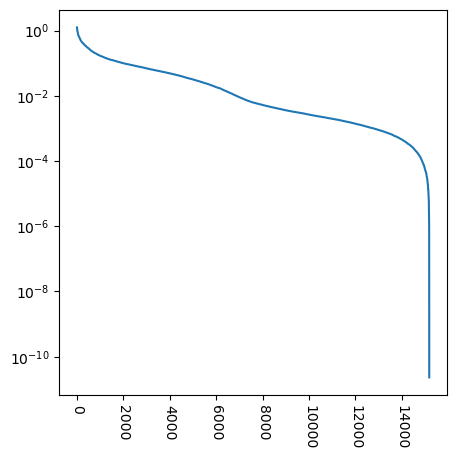

In [89]:
plt.figure(figsize=(5, 5))
_ = plt.plot(
  np.array(np.abs(feature_importances))
)
plt.semilogy()
_ = plt.xticks(rotation=-90)

На данном графике фидно, что большинство признаков из ~15000 важны для определения стоимости автомобиля и совсем немногие признаки имеют почти нулевые веса.

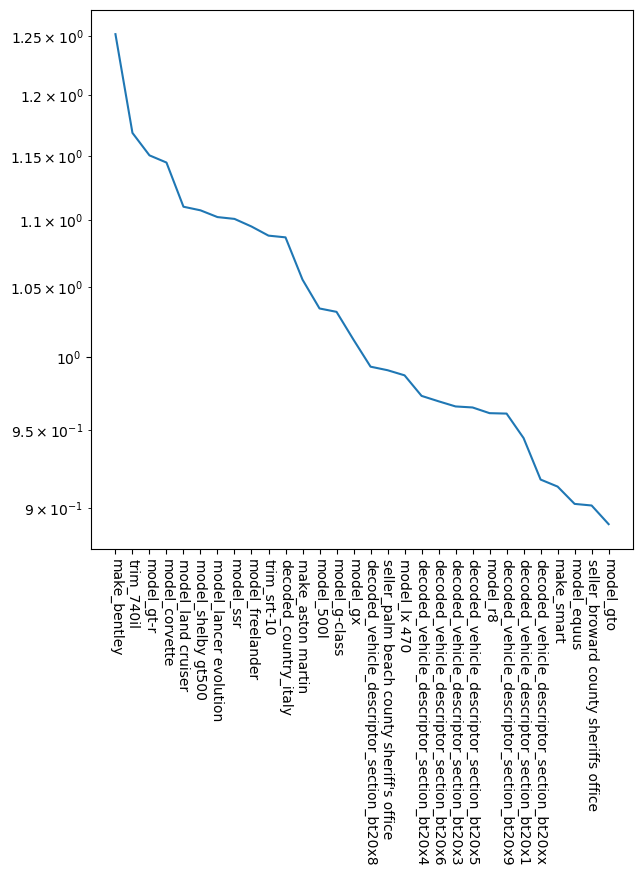

In [90]:
plt.figure(figsize=(7, 7))
_ = plt.plot(
    np.array(col_names_X_train[:30]),
    np.array(np.abs(feature_importances)[:30])
)
plt.semilogy()
_ = plt.xticks(rotation=-90)

In [91]:
data = {
    'Feature Names': np.array(col_names_X_train[:30]),
    'Feature Importances': np.array(np.abs(feature_importances)[:30])
}

df = pd.DataFrame(data)
df.set_index('Feature Importances', inplace=True)

display(df)


,Feature Names
Feature Importances,
1.251719,make_bentley
1.168551,trim_740il
1.150426,model_gt-r
1.144688,model_corvette
1.110011,model_land cruiser
1.107231,model_shelby gt500
1.102038,model_lancer evolution
1.100640,model_ssr
1.094826,model_freelander


## Выводы

Данные были загружены и изучены. Были отфильтрованы выбросы, заполнены пропуски в данных и сгенерированы дополнительные признаки. Категориальные и численные данные были закодированы и стандартизированы для обучения моделей, а также были составлены n-граммы строковых призкаков, частота встречаемости которых была подсчитата CountVectorizer.

Были изучены три модели: `DecisionTreeRegressor`, `Ridge Regressor` и `нейронная сеть`.

В данном случае *нейонная сеть* показала наилучший результат метрики MAPE, поэтому рекомендовано использовать ее для предсказания стоимости автомобилей вторичного рынка.

Наиболее важные 30 признаков, влияющие на модель, имеют значения в диапазоне от 1.25 до 0.88 по мере их важности.

Названия марок и моделей автомобилей (например, `make_bentley`, `model_gt-r`, `model_corvette`) являются наиболее важными признаками, влияющими на предсказания модели. Это может указывать на то, что *конкретные марки и модели автомобилей имеют сильное воздействие на цену*.
Другие признаки, такие как информация о регионе (`decoded_country_italy`), продавце (`seller_palm beach county sheriff's office`, `seller_broward county sheriffs office`) и характеристики транспортного средства (`decoded_vehicle_descriptor_section_bt20x8`, `decoded_vehicle_descriptor_section_bt20x4`), также оказывают существенное воздействие на предсказания модели. Очень важно учитывать также и декодиорованные признаки.

Наименее важные признаки имеют значения близкие к 0, но их относительно мало в предоставленных данных.

Учитывая обнаруженную линейную закономерность в информации о данных (например, что стоимость автомобиля в зависимости от года, пробега и так далее), рекомендуется активно использовать линейные модели, такие как линейная регрессия или Ridge и нейронные сети. Эти модели могут хорошо описать линейные зависимости в данных.

Для улучшения модели или дальнейшего исследования можно сконцентрироваться на наиболее важных признаках и учесть их в дальнейшей работе. 


## Рекомендации по дальнейшей работе

**Оптимизация Модели**: Поскольку нейронная сеть показала наилучший результат MAPE, рекомендуется провести дополнительную оптимизацию этой модели. Это может включать в себя настройку гиперпараметров сети, увеличение размера обучающей выборки или применение архитектурных изменений. Тщательное исследование нейронных сетей для данной задачи может привести к дополнительным улучшениям.

**Feature Engineering**: Рекомендуется исследовать возможности для создания новых признаков на основе текущих данных, например, дополнительная более детальная техническая информация по автомобилю и его состоянию, истории (например, история аварий, история страхований) которую можно использовать для улучшения модели.

**Внешние данные**: Рассмотрите возможность интеграции внешних данных, таких как информация о рынке автомобилей или экономические показатели, которые могут повлиять на цены на автомобили.

**Мониторинг и Обновление**: Необходимо непрерывно мониторить производительность модели на новых данных и обновлять ее при необходимости. Рынок автомобилей постоянно меняется, и модель должна быть актуальной.

**Изменения в Регулировании**: Информация о любых изменениях в законодательстве или правилах, связанных с автомобилями (например, экологические стандарты или налоги), может быть важной для понимания изменений в ценах.

**Анализ Сезонных Факторов**: Важно изучить информацию о сезонных факторах, которые могут повлиять на цены на автомобили. Например, спрос на кабриолеты может возрастать в летние месяцы.

